In [3]:
import utils_general
import utils_uncoup
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

%load_ext autoreload
%autoreload 2

# Experiment 1: Uncoupled 3 box model

### $C(r)\frac{\partial T(t)}{\partial{t}} = F(t) + \lambda(r) T(t)$,
where $C(r)$ is the heat capacity ($C = \rho_{\text{w}} \, c_{\text{w}} \, h(r)$, $\rho_{\text{w}} = 10^3$, $c_{\text{w}} = 4 \times 10^3$), $T(t)$ is the temperature, $F(t)$ is the effective radiative forcing, and $\lambda(r)$ is the local feedback parameter; $r$ denotes the region.

This relationship represents warming due to effective radiative forcing (ERF). This problem in 1D assumes that we are averaging over a few locations (e.g. land, Southern Ocean, and Arctic). The parameters of interest are given by:

| Parameter                                        | Symbol       | Fast  | Intermediate | Slow  |
|--------------------------------------------------|--------------|-------|--------------|-------|
| Effective water depth (m)                        | $h(r)$       | 10    | 150          | 1500  |
| Local Feedback (W m<sup>-2</sup> K<sup>-1</sup>) | $\lambda(r)$ | -0.86 | -2.0         | -0.67 |

We consider the following forcing profiles of interest:

| Forcing Type | Functional Form           | Value(s)                              |
|--------------|---------------------------|---------------------------------------|
| Constant     | $F$                       | 3.7, 7.4                              |
| Exponential  | $a e^{t/t^*}$             | $a = F_{\text{final}} / e^{250/t^*}$  |
| Overshoot    | $a e^{\frac{-(t - b)^2}{2c^2}}$ | $a = 4$, $b = 200$, $c = 42.7$        |

where $F_{\text{final}}$ is the radiative forcing at the end of the simulation (e.g. 7 W m<sup>-2</sup> K<sup>-1</sup> for SSP370) and $t^*$ is 50 years.

### Integrated solutions to experiments of interest

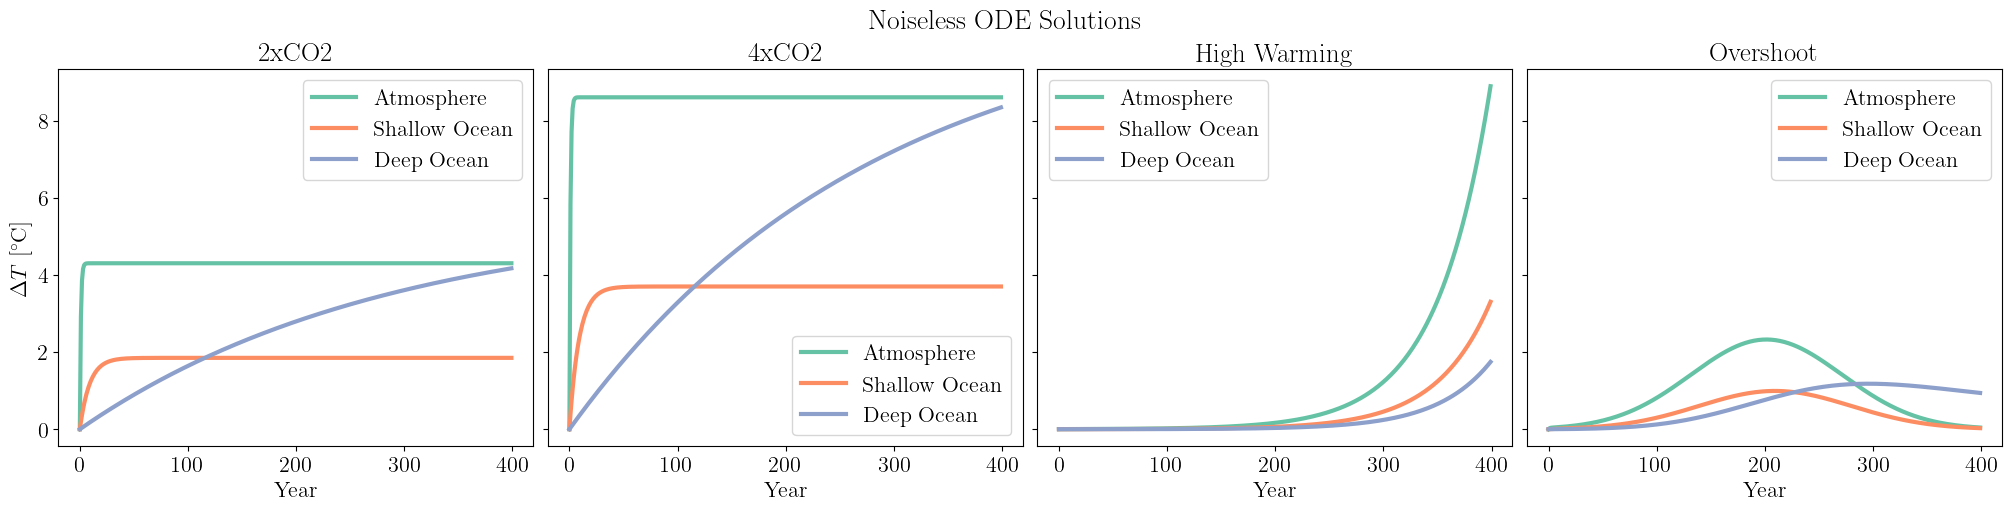

In [4]:
T_ODE, g_ODE, a_ODE = utils_uncoup.create_uncoup(noisy=False)

#### Method 1: Direct derivation of Green's function

Error from Raw estimation.
	L2 Error, 2xCO2: 0.0
	L2 Error, 4xCO2: 0.0
	L2 Error, High Warming: 0.0
	L2 Error, Overshoot: 0.0
Avg. L2 Error: 0.0

Error from Modal estimation.
	L2 Error, 2xCO2: 0.0
	L2 Error, 4xCO2: 0.0
	L2 Error, High Warming: 0.0
	L2 Error, Overshoot: 0.0
Avg. L2 Error: 0.0



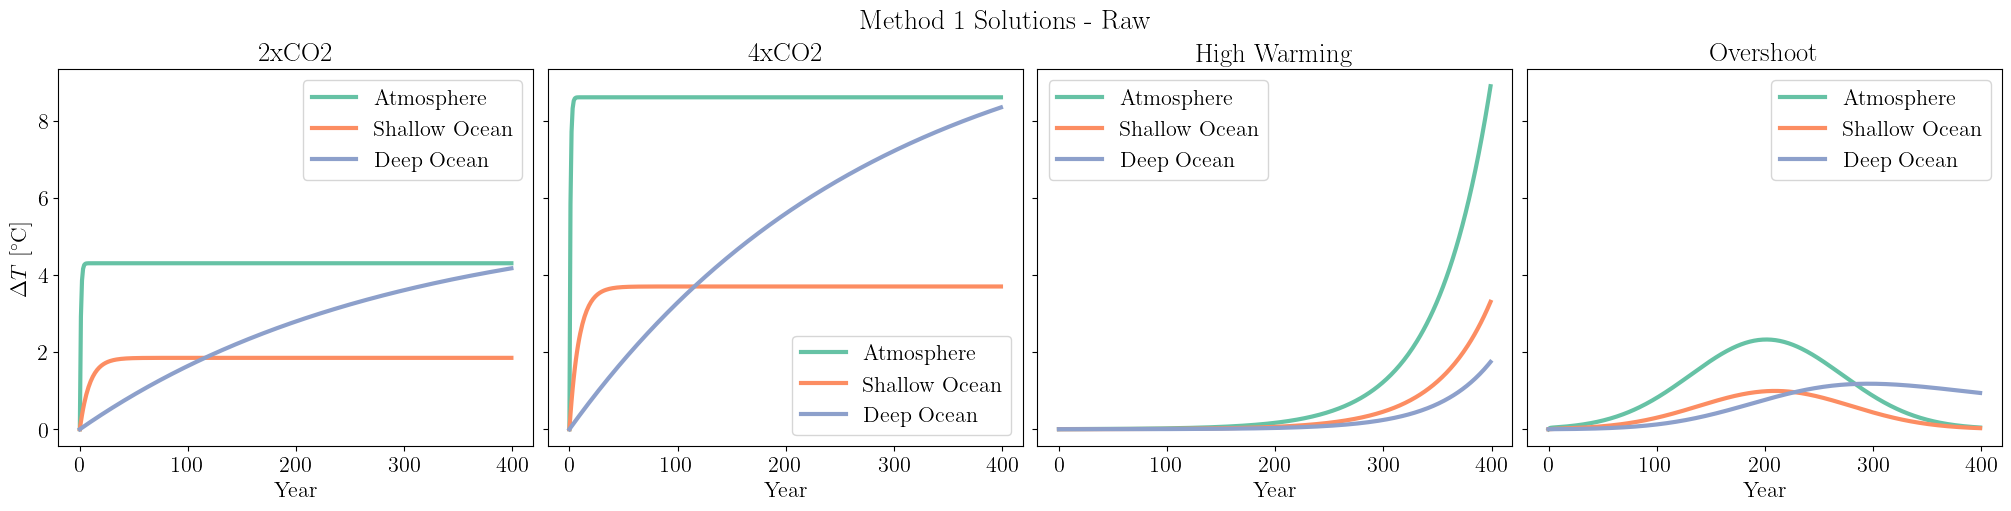

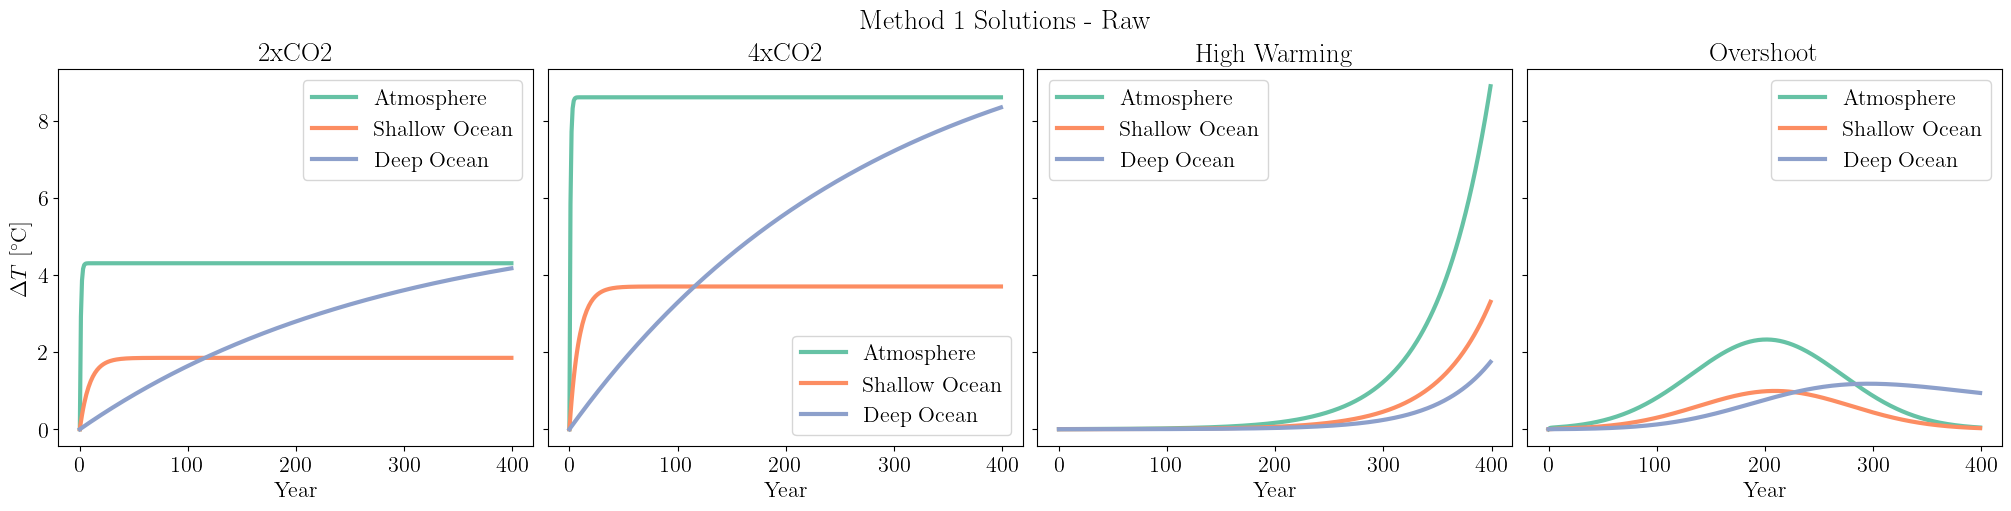

In [24]:
T_raw_method_1, T_modal_method_1, L2_raw_method_1, L2_modal_method_1 = utils_uncoup.method_1_direct(T_ODE, modal=True)

#### Method 2: Direct inference of L from a dataset

Error from Raw estimation.
	L2 Error, 2xCO2: 0.00015
	L2 Error, 4xCO2: 0.00015
	L2 Error, High Warming: 0.00297
	L2 Error, Overshoot: 1e-05
Avg. L2 Error: 0.00082

Error from Modal estimation.
	L2 Error, 2xCO2: 0.00015
	L2 Error, 4xCO2: 0.00015
	L2 Error, High Warming: 0.00297
	L2 Error, Overshoot: 1e-05
Avg. L2 Error: 0.00082



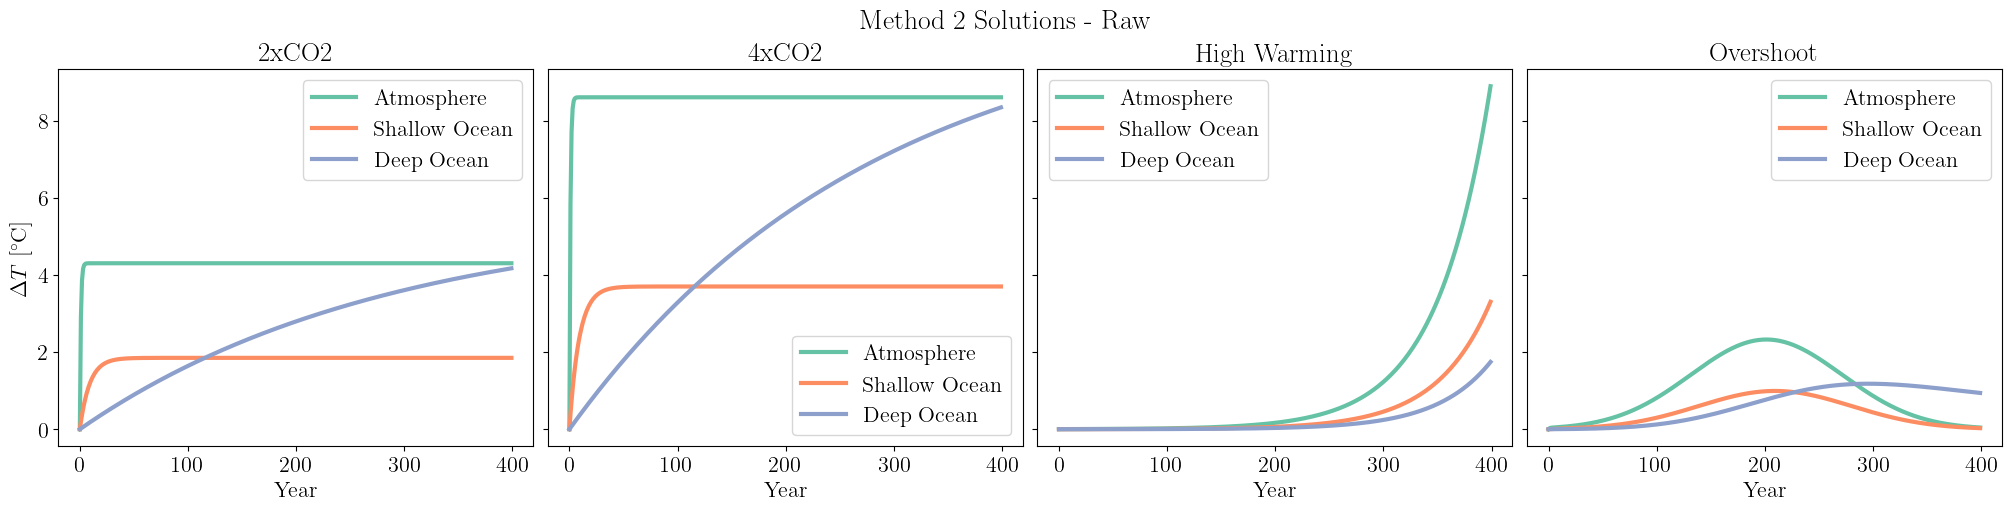

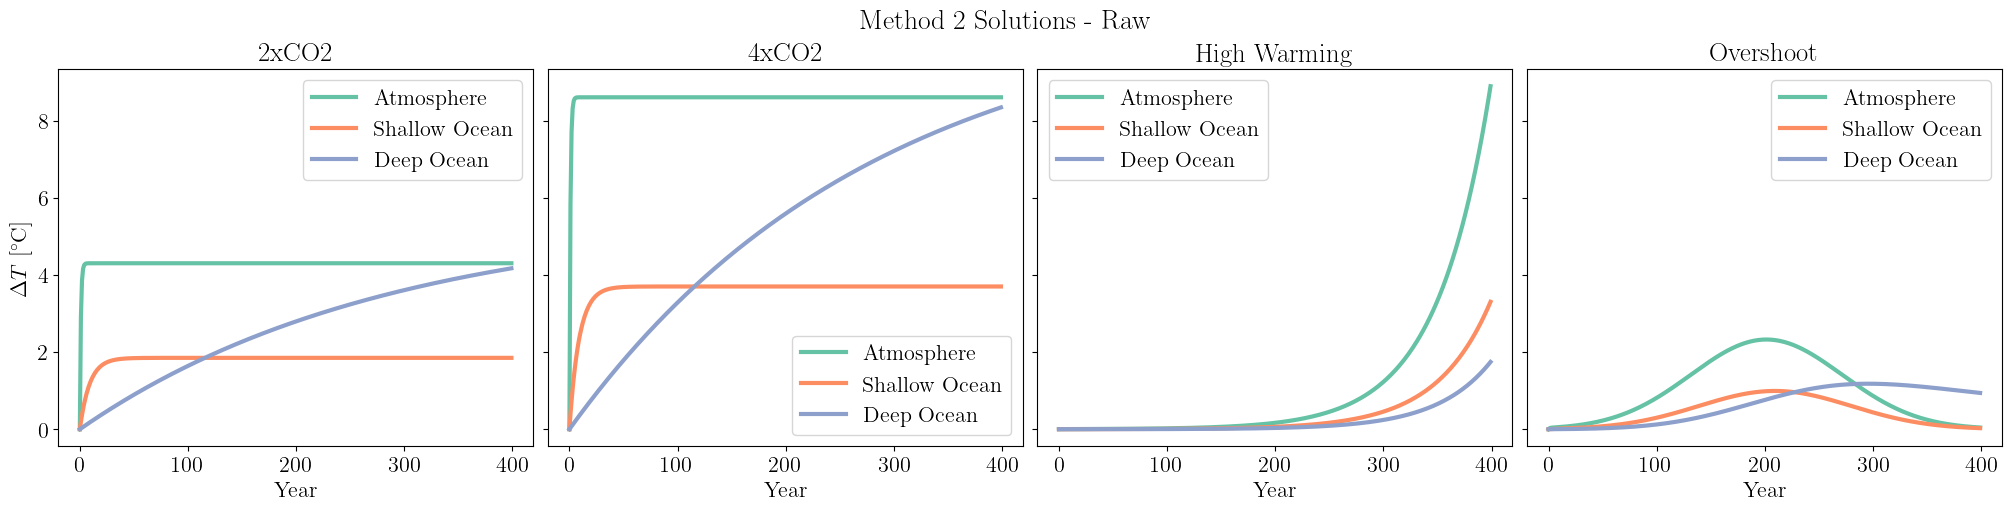

In [33]:
T_raw_method_2, T_modal_method_2, L2_raw_method_2, L2_modal_method_2 = utils_uncoup.method_2_L(T_ODE, g_ODE, a_ODE, modal=True)

#### Method 3: Direct deconvolution of response function from dataset

Error from Raw estimation.
	L2 Error, 2xCO2: 0.0
	L2 Error, 4xCO2: 0.0
	L2 Error, High Warming: 0.0
	L2 Error, Overshoot: 0.0
Avg. L2 Error: 0.0

Error from Modal estimation.
	L2 Error, 2xCO2: 0.0
	L2 Error, 4xCO2: 0.0
	L2 Error, High Warming: 0.0
	L2 Error, Overshoot: 0.0
Avg. L2 Error: 0.0



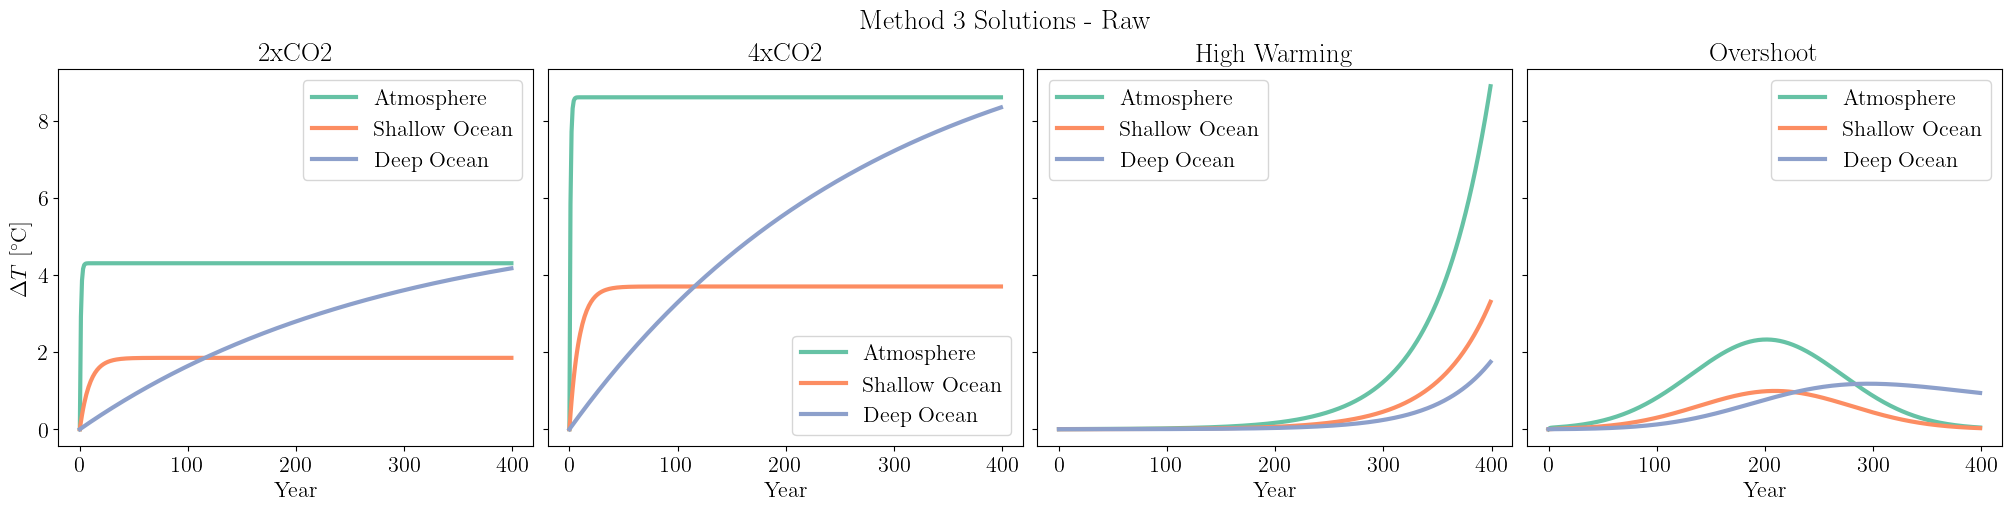

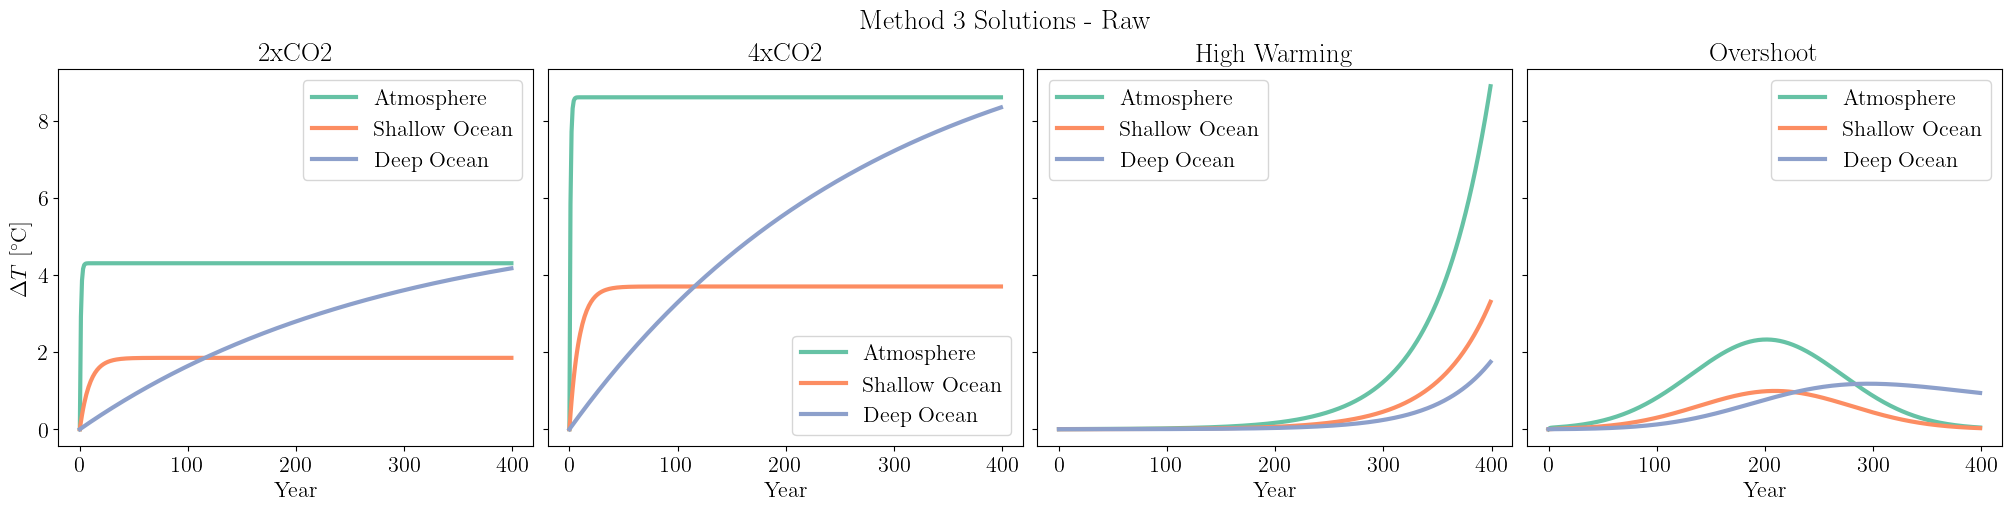

In [25]:
T_raw_method_3, T_modal_method_3, L2_raw_method_3, L2_modal_method_3 = utils_uncoup.method_3_deconv(T_ODE, modal=True)

#### Method 4: Estimation of response function using only leading timescales

Error from Raw estimation.
	L2 Error, 2xCO2: 0.00056
	L2 Error, 4xCO2: 0.0005
	L2 Error, High Warming: 0.00298
	L2 Error, Overshoot: 2e-05
Avg. L2 Error: 0.00101

Error from Modal estimation.
	L2 Error, 2xCO2: 0.00014
	L2 Error, 4xCO2: 0.00016
	L2 Error, High Warming: 0.00294
	L2 Error, Overshoot: 1e-05
Avg. L2 Error: 0.00081



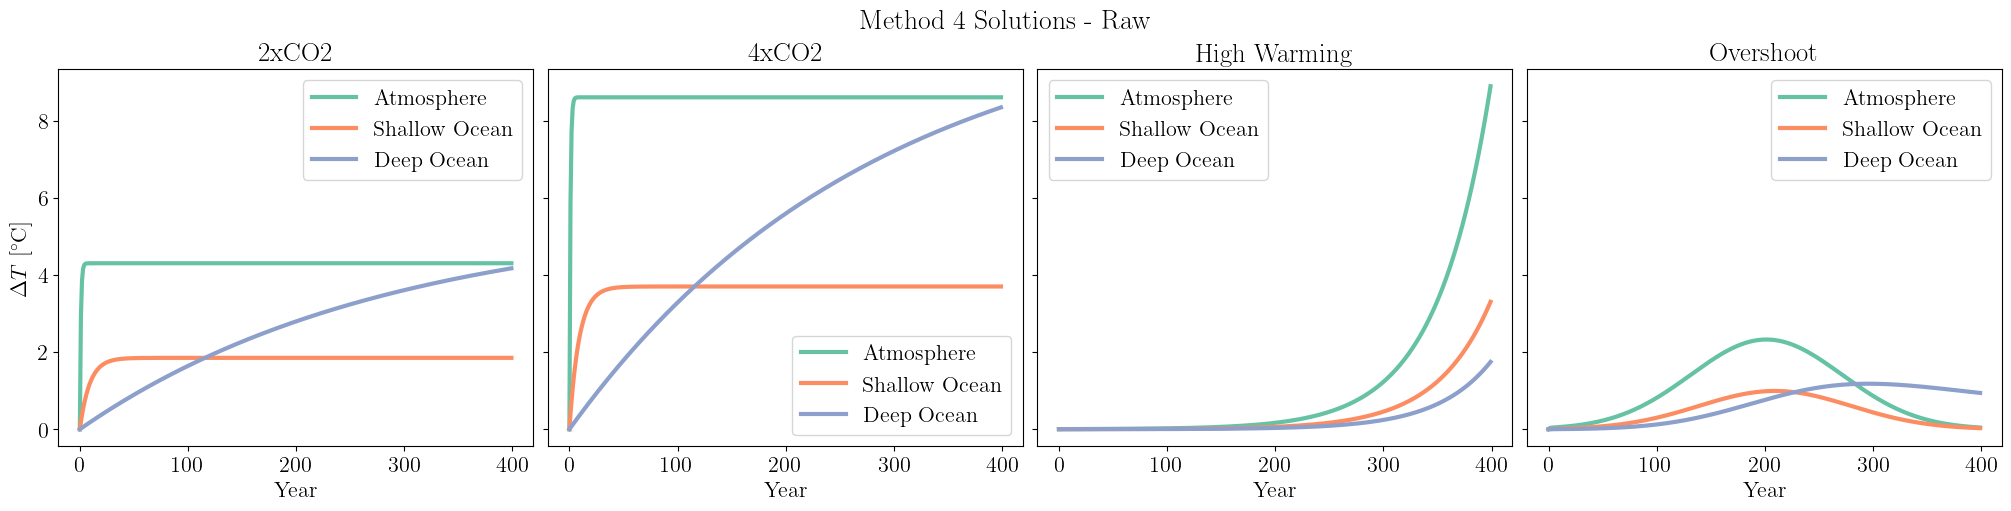

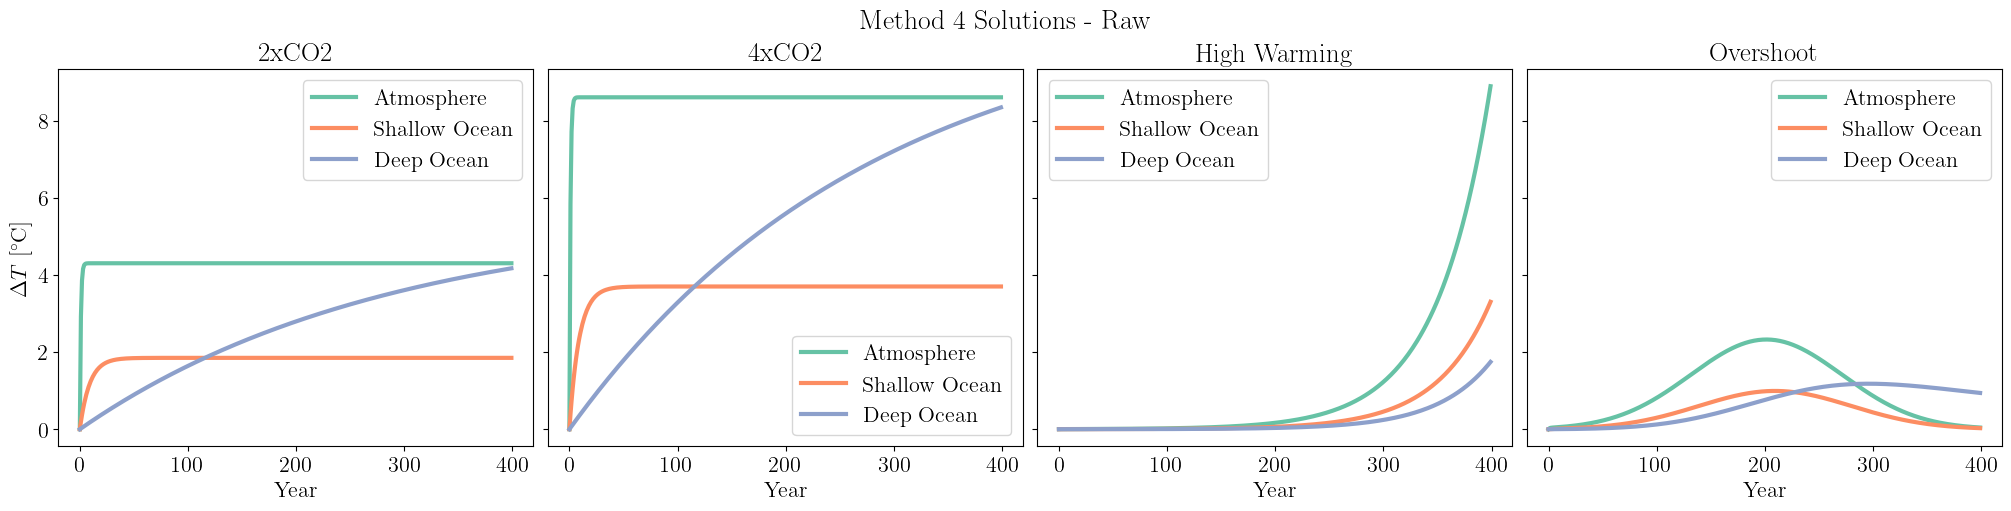

In [5]:
T_raw_method_4, T_modal_method_4, L2_raw_method_4, L2_modal_method_4, res_raw = utils_uncoup.method_4_fit(T_ODE, g_ODE, a_ODE, modal=True)